# Image Debluring and Poission Stitching
- Author: Zhen Tong 120090694 
- April 1


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

import os


###   Part 1. The "Constrained Least Squares Filtering" (CLSF)
####  Step 0. Get the noised Image

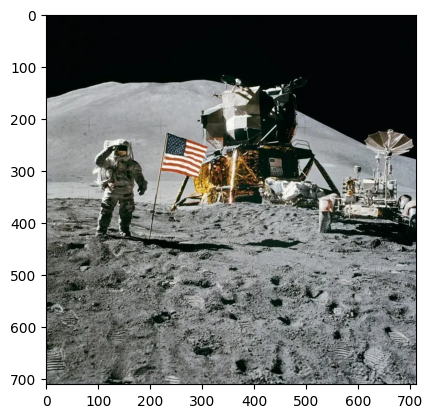

In [2]:
# img_path = "../data/a44w9-kvhmn.jpg"
img_path = "../data/Apollo_15_flag_rover_LM_Irwin-1200x1200.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

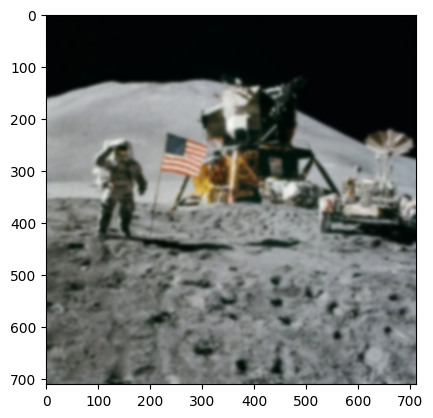

In [3]:
def get_gaussian_kernel(k_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(k_size-1)/2)**2 + (y-(k_size-1)/2)**2)/(2*sigma**2)), (k_size, k_size))
    return kernel / np.sum(kernel)

def add_gaussian_noise(img:np.ndarray, k_size = 17, sigma0 = 3, \
                        sigma_r = 0.01, sigma_g = 0.03, sigma_b = 0.1):
    
    kernel = get_gaussian_kernel(k_size, sigma0)
    h_x = np.zeros_like(img).astype(np.float64)
    for i in range(3):  # 3 channels for RGB
        h_x[:,:,i] = cv2.filter2D(img[:,:,i], -1, kernel, borderType=cv2.BORDER_REPLICATE)


    h, w, c = img.shape    
    
    h_x[:, :, 0] +=  np.random.normal(0, sigma_r, (h, w))
    h_x[:, :, 1] +=  np.random.normal(0, sigma_g, (h, w))
    h_x[:, :, 2] +=  np.random.normal(0, sigma_b, (h, w))
    return h_x.astype(np.int32)
    

b = add_gaussian_noise(img)
plt.imshow(b)

#### Step 1. Frequency Domain Transformation